In [2191]:
import csv
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
%matplotlib inline

In [2192]:
#cur.execute(""" SELECT  FROM movie_basics; """)

In [2193]:
csv_movie_gross_file_path =".\\zippedData\\bom.movie_gross.csv.gz"
path ='\\Users\\eggfr\\Flatiron\\Flatiron_projects\\dsc-phase-1-project-v2-4\\zippedData\\bom.movie_gross.csv.gz'

In [2273]:
merge_imdb_mgorss_df = mgross_df.merge(imdb_df,how = "left", left_on ='title', right_on='primary_title')

In [2265]:
imdb_df.columns

Index(['Unnamed: 0', 'movie_id', 'primary_title', 'original_title',
       'start_year', 'runtime_minutes', 'genres'],
      dtype='object')

In [2279]:
merge_imdb_mgorss_df.isna().sum()
pt2_merge_df = merge_imdb_mgorss_df.dropna(subset=['runtime_minutes'])
pt2_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 2478
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1902 non-null   object 
 1   studio           1902 non-null   object 
 2   domestic_gross   1902 non-null   float64
 3   foreign_gross    1902 non-null   float64
 4   year             1902 non-null   int64  
 5   total_gross      1902 non-null   float64
 6   Unnamed: 0       1902 non-null   float64
 7   movie_id         1902 non-null   object 
 8   primary_title    1902 non-null   object 
 9   original_title   1902 non-null   object 
 10  start_year       1902 non-null   float64
 11  runtime_minutes  1902 non-null   float64
 12  genres           1894 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 208.0+ KB


In [2194]:
mgross_df = pd.read_csv(csv_movie_gross_file_path)
mgross_df = mgross_df.dropna(subset=['domestic_gross','foreign_gross','studio'],how='any') #drop domestic_gross, and studio N/A value
mgross_df.domestic_gross = pd.to_numeric(mgross_df.domestic_gross)                  #change it to float
mgross_df.foreign_gross = mgross_df.foreign_gross.str.replace(',','').astype(float) #change it to float
mgross_df['total_gross'] = mgross_df.domestic_gross + mgross_df.foreign_gross  # total = domestic+foreign
#mgross_df.info()

#mgross_df.sort_values(by =['domestic_gross'], ascending=False).head(30)
#studio_group = mgross_df.groupby(['studio'])
#studio_stat = mgross_df.sort_values(['domestic_gross'],ascending =False).groupby('studio').head()  #using groupby for each studio to find out which studio is most profitable in the last 8 years
#studio_stat
#studio_stat = mgross_df.groupby('studio').domestic_gross.agg(['count','min','max','mean'], ascending = False)
#studio_stat

#_index().sort_values(['foreign_gross'],ascending = False).head(10))
#studio_gross

#fig,ax=plt.subplots(figsize=(8,6))
#ax.scatter(mgross_df['year'],mgross_df['total_gross'])
#ax.set_title("Jim's video Library")
#ax.set_ylabel("Total_gross")
#ax.set_xlabel("Year")

In [2195]:
opening_gross = mgross_df[['year','domestic_gross','foreign_gross']]
year_foreignstat = mgross_df.groupby(['year']).foreign_gross.sum()
year_foreignstat_df = year_foreignstat.to_frame()
year_domesticstat = mgross_df.groupby(['year']).domestic_gross.sum()
year_domesticstat_df = year_domesticstat.to_frame()

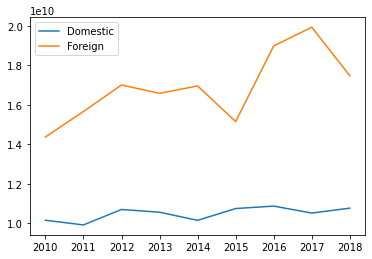

In [2196]:
pt0_df = pd.concat([year_domesticstat_df,year_foreignstat_df], axis =1)
pt0_df
df = pd.DataFrame({
   'Domestic': pt0_df['domestic_gross'],
   'Foreign': pt0_df['foreign_gross']
   }, index=[2010, 2011, 2012, 2013, 2014,2015,2016,2017,2018])
lines = df.plot.line()

In [2280]:

studio_stat = mgross_df.groupby(['studio']).foreign_gross.sum()
studio_stat_df = studio_stat.to_frame()
studio_stat_df.sort_values(by=['foreign_gross'], ascending = False)
film_stat = mgross_df.groupby(['studio']).title.count()
film_stat_df = film_stat.to_frame()
studio_stat_df.shape


pt1_df = pd.concat([film_stat_df,studio_stat_df,], axis =1)
pt1_df['avg_foreign_gross'] = pt1_df['foreign_gross'] / pt1_df['title']
pt1_df  =pt1_df.sort_values(by=['avg_foreign_gross'], ascending = False)
pt1_df = pt1_df[pt1_df.title > 16]                        # 2 movies per year as my qualifier to filter out studio that produces just a few movies
pt1_df = pt1_df.rename(columns={'title':'#_of_movies'})   #rename pt1_df['title'] to number of movies
pt1_df.head()

,#_of_movies,foreign_gross,avg_foreign_gross
studio,,,
BV,104,2.579385e+10,2.480178e+08
Fox,134,2.005587e+10,1.496706e+08
WB (NL),44,6.339000e+09,1.440682e+08
WB,130,1.866790e+10,1.435993e+08
Sony,105,1.394524e+10,1.328118e+08


In [2198]:
studio_stat_year = mgross_df.groupby(['studio']).foreign_gross.sum()

In [2199]:
studiobv_grp = mgross_df.groupby(['studio'])
studiobv_grp = studiobv_grp.get_group('BV').sort_values(by=['foreign_gross'], ascending = False)
studiobv_grp

,title,studio,domestic_gross,foreign_gross,year,total_gross
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09
330,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011,1.045700e+09
...,...,...,...,...,...,...
2019,Monkey Kingdom,BV,16399999.0,711000.0,2015,1.711100e+07
95,Secretariat,BV,59700000.0,537000.0,2010,6.023700e+07
304,Waking Sleeping Beauty,BV,80700.0,4200.0,2010,8.490000e+04
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08


In [2224]:
studio_WBgrp = mgross_df.groupby(['studio'])
studio_WBgrp = studio_WBgrp.get_group('WB').sort_values(by=['foreign_gross'], ascending = False)
studio_WBgrp

,title,studio,domestic_gross,foreign_gross,year,total_gross
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
729,The Dark Knight Rises,WB,448100000.0,636800000.0,2012,1.084900e+09
2329,Fantastic Beasts and Where To Find Them,WB,234000000.0,580000000.0,2016,8.140000e+08
...,...,...,...,...,...,...
1982,Max (2015),WB,42700000.0,1300000.0,2015,4.400000e+07
169,Jonah Hex,WB,10500000.0,356000.0,2010,1.085600e+07
454,A Very Harold & Kumar 3D Christmas,WB,35100000.0,326000.0,2011,3.542600e+07
853,Joyful Noise,WB,30900000.0,226000.0,2012,3.112600e+07


In [2225]:
studio_Sonygrp = mgross_df.groupby(['studio'])
studio_Sonygrp = studio_Sonygrp.get_group('Sony').sort_values(by=['foreign_gross'], ascending = False)
studio_Sonygrp

,title,studio,domestic_gross,foreign_gross,year,total_gross
728,Skyfall,Sony,304400000.0,804200000.0,2012,1.108600e+09
1877,Spectre,Sony,200100000.0,680600000.0,2015,8.807000e+08
3085,Venom (2018),Sony,213500000.0,641500000.0,2018,8.550000e+08
2762,Jumanji: Welcome to the Jungle,Sony,404500000.0,557600000.0,2017,9.621000e+08
2335,The Mermaid (Mei ren yu),Sony,3200000.0,550600000.0,2016,5.538000e+08
...,...,...,...,...,...,...
2952,Poster Boys,Sony,97000.0,2400000.0,2017,2.497000e+06
2542,El Jeremias,Sony,650000.0,1900000.0,2016,2.550000e+06
3263,The Front Runner,Sony,2000000.0,1200000.0,2018,3.200000e+06
2907,"Roman J. Israel, Esq.",Sony,12000000.0,1100000.0,2017,1.310000e+07


In [2226]:
studio_Foxgrp = mgross_df.groupby(['studio'])
studio_Foxgrp = studio_Foxgrp.get_group('Fox').sort_values(by=['foreign_gross'], ascending = False)
studio_Foxgrp

,title,studio,domestic_gross,foreign_gross,year,total_gross
731,Ice Age: Continental Drift,Fox,161300000.0,715900000.0,2012,877200000.0
3084,Bohemian Rhapsody,Fox,216400000.0,687200000.0,2018,903600000.0
1482,X-Men: Days of Future Past,Fox,233900000.0,513900000.0,2014,747800000.0
1484,Dawn of the Planet of the Apes,Fox,208500000.0,502100000.0,2014,710600000.0
737,Life of Pi,Fox,125000000.0,484000000.0,2012,609000000.0
...,...,...,...,...,...,...
134,Ramona and Beezus,Fox,26200000.0,1100000.0,2010,27300000.0
827,Red Tails,Fox,49900000.0,489000.0,2012,50389000.0
522,The Big Year,Fox,7200000.0,244000.0,2011,7444000.0
2527,Rules Don't Apply,Fox,3700000.0,233000.0,2016,3933000.0


In [2228]:
studio_WBNLgrp = mgross_df.groupby(['studio'])
studio_WBNLgrp = studio_WBNLgrp.get_group('WB (NL)').sort_values(by=['foreign_gross'], ascending = False)
studio_WBNLgrp

,title,studio,domestic_gross,foreign_gross,year,total_gross
730,The Hobbit: An Unexpected Journey,WB (NL),303000000.0,718100000.0,2012,1.021100e+09
1478,The Hobbit: The Battle of the Five Armies,WB (NL),255100000.0,700900000.0,2014,9.560000e+08
1130,The Hobbit: The Desolation of Smaug,WB (NL),258399999.0,700000000.0,2013,9.584000e+08
2770,It,WB (NL),327500000.0,372900000.0,2017,7.004000e+08
3099,Rampage (2018),WB (NL),101000000.0,327000000.0,2018,4.280000e+08
1887,San Andreas,WB (NL),155200000.0,318800000.0,2015,4.740000e+08
3104,The Nun,WB (NL),117500000.0,248100000.0,2018,3.656000e+08
750,Journey 2: The Mysterious Island,WB (NL),103900000.0,231400000.0,2012,3.353000e+08
2349,The Conjuring 2,WB (NL),102500000.0,217900000.0,2016,3.204000e+08
2789,Annabelle: Creation,WB (NL),102100000.0,204400000.0,2017,3.065000e+08


In [2231]:
studiotop5_df = pd.concat([studiobv_grp,studio_WBgrp,studio_Sonygrp,studiobv_Foxgrp,studio_WBNLgrp], axis =0)
studiotop5_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 1875 to 2427
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           517 non-null    object 
 1   studio          517 non-null    object 
 2   domestic_gross  517 non-null    float64
 3   foreign_gross   517 non-null    float64
 4   year            517 non-null    int64  
 5   total_gross     517 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 28.3+ KB


In [2232]:
imdb_file_path =".\\zippedData\\sqldataframephase1.csv"

In [2233]:
imdb_df = pd.read_csv(imdb_file_path)
imdb_df

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
146139,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [2236]:
imdb_studiotop5_df = pd.merge(studiotop5_df,imdb_df,how = "inner", left_on ='title', right_on='primary_title') 
imdb_studiotop5_df.dropna(subset=['genres'],inplace = True)
imdb_studiotop5_df.title.nunique()

418

In [2250]:
imdb_studiotop5_time_df = pd.merge(imdb_studiotop5_df,mbudget_df,how = "inner", left_on ='title', right_on='movie')
imdb_studiotop5_time_df.head()

,title,studio,domestic_gross_x,foreign_gross,year,total_gross,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
1,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,6647,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport",56,"Nov 22, 2013",Frozen,"$150,000,000","$400,738,009","$1,272,469,910"
2,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,10824,tt1611845,Frozen,Wai nei chung ching,2010,92.0,"Fantasy,Romance",56,"Nov 22, 2013",Frozen,"$150,000,000","$400,738,009","$1,272,469,910"
3,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,35107,tt2294629,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy",56,"Nov 22, 2013",Frozen,"$150,000,000","$400,738,009","$1,272,469,910"
4,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09,6453,tt1300854,Iron Man 3,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi",48,"May 3, 2013",Iron Man 3,"$200,000,000","$408,992,272","$1,215,392,272"


In [2259]:
pt2_df = imdb_studiotop5_time_df[["studio","title","release_date","genres","production_budget","foreign_gross"]]
pt2_df = pt2_df.drop_duplicates(subset=["title"],keep = False)
pt2_df.head()

,studio,title,release_date,genres,production_budget,foreign_gross
0,BV,Avengers: Age of Ultron,"May 1, 2015","Action,Adventure,Sci-Fi","$330,600,000",946400000.0
4,BV,Iron Man 3,"May 3, 2013","Action,Adventure,Sci-Fi","$200,000,000",805800000.0
5,BV,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","Action,Adventure,Fantasy","$410,600,000",804600000.0
6,BV,Captain America: Civil War,"May 6, 2016","Action,Adventure,Sci-Fi","$250,000,000",745200000.0
7,BV,Zootopia,"Mar 4, 2016","Adventure,Animation,Comedy","$150,000,000",682500000.0


In [2262]:
pt2_df.shape

(324, 6)

In [2209]:
csv_movie_budgets_file_path =".\\zippedData\\tn.movie_budgets.csv.gz"

In [2210]:
mbudget_df = pd.read_csv(csv_movie_budgets_file_path)
#mbudget_df.mbudget_dfestic_gross
#mbudget_df


AttributeError: 'DataFrame' object has no attribute 'dommbudget_dfestic_gross'

In [ ]:
#mbudget_df['production_budget'] = mbudget_df['production_budget'].str.replace('$','').str.replace(',','')
#mbudget_df.production_budget = pd.to_numeric(mbudget_df.production_budget).astype(float)
#mbudget_df['domestic_gross'] = mbudget_df['domestic_gross'].str.replace('$','').str.replace(',','')
#mbudget_df.production_budget = pd.to_numeric(mbudget_df.production_budget).astype(float)
#mbudget_df['worldwide_gross'] = mbudget_df['worldwide_gross'].str.replace('$','').str.replace(',','')
#mbudget_df.worldwide_gross = pd.to_numeric(mbudget_df.worldwide_gross).astype(float)
#mbudget_df['total_net_gross'] = mbudget_df['worldwide_gross'] + mbudget_df['domestic_gross']
#mbudget_df['foreign_gross'] = mbudget_df['worldwide_gross'] - mbudget_df['domestic_gross']
#mbudget_df['profit_percent'] =  (mbudget_df['total_net_gross'] - mbudget_df['production_budget'])/ mbudget_df['production_budget'] * 100
#mbudget_df['profit_percent_domestic'] = (mbudget_df['domestic_gross'] - mbudget_df['production_budget']) / mbudget_df['production_budget'] * 100
#mbudget_df['profit_percent_foreign'] = (mbudget_df['foreign_gross'] - mbudget_df['production_budget']) / mbudget_df['production_budget'] * 100

In [ ]:
mbudget_df['production_budget'] = mbudget_df['production_budget'].str.replace('$','').str.replace(',','')
mbudget_df.production_budget = pd.to_numeric(mbudget_df.production_budget).astype(float)
mbudget_df['domestic_gross'] = mbudget_df['domestic_gross'].str.replace('$','').str.replace(',','')
mbudget_df.domestic_gross = pd.to_numeric(mbudget_df.domestic_gross).astype(float)
mbudget_df['worldwide_gross'] = mbudget_df['worldwide_gross'].str.replace('$','').str.replace(',','')
mbudget_df.worldwide_gross = pd.to_numeric(mbudget_df.worldwide_gross).astype(float)
mbudget_df['total_net_gross'] = mbudget_df['worldwide_gross'] + mbudget_df['domestic_gross']
mbudget_df['foreign_gross'] = mbudget_df['worldwide_gross'] - mbudget_df['domestic_gross']
mbudget_df['profit_percent'] =  (mbudget_df['total_net_gross'] - mbudget_df['production_budget'])/ mbudget_df['production_budget'] * 100
mbudget_df['profit_percent_domestic'] = (mbudget_df['domestic_gross'] - mbudget_df['production_budget']) / mbudget_df['production_budget'] * 100
mbudget_df['profit_percent_foreign'] = (mbudget_df['foreign_gross'] - mbudget_df['production_budget']) / mbudget_df['production_budget'] * 100

In [ ]:
mbudget_df.info()

In [ ]:
mbudget_df.describe()

In [ ]:
mbudget_df[["production_budget", "profit_percent","profit_percent_domestic","profit_percent_foreign"]]

In [ ]:
pt2_df = mbudget_df[["production_budget", "profit_percent","profit_percent_domestic","profit_percent_foreign"]]

pt2_df  =pt2_df.sort_values(by=['profit_percent_foreign'], ascending = False)
pt2_df.describe()

In [ ]:
pt2_df.boxplot('profit_percent_domestic')

In [ ]:
pt2_df.boxplot('profit_percent_foreign')

In [ ]:
fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
prod_budget = mbudget_df['production_budget']
foreign_gross = mbudget_df['profit_percent_foreign']
plt.scatter(prod_budget,foreign_gross)
plt.xlim([0,100000000])
plt.ylim([-100,500])
#plt.set_title ('Relationship beween production budget vs foreign profit margin')
#plt.set_xlabel('production Budget')
#plt.set_ylabel('Foregin Gross in Percentage')
plt.show

In [ ]:
pd.merge(mbudget_df, mgross_df,how = "outer", left_on ='domestic_gross', right_on='domestic_gross')
#pd.merge.info()

In [ ]:
#fig,ax=plt.subplots(figsize=(8,6))
#x=mbudget_df['domestic_gross']
#y=mbudget_df['profit_percent']
#plt.scatter(x,y)

In [ ]:
#fig,ax=plt.subplots(figsize=(8,6))
#plt.scatter(mbudget_df['domestic_gross'],mbudget_df['total_net_gross'])


#ax.set_title("Jim's video Library")
#ax.set_ylabel("Total_gross")
#ax.set_xlabel("Year")

In [ ]:
csv_movie_info_file_path =".\\zippedData\\rt.movie_info.tsv.gz"

In [ ]:
movie_info_df = pd.read_csv(csv_movie_info_file_path, sep ='\t')
movie_info_df



In [ ]:
csv_movie_review_file_path =".\\zippedData\\rt.reviews.tsv.gz"
csv_movie_review_df = pd.read_csv(csv_movie_review_file_path,sep ='\t',encoding ='latin1')
review_df = csv_movie_review_df.groupby('id')['fresh'].value_counts(normalize = True) # noirmalize the movie reiew and see how many pass .500
review_df.to_frame()
pt3 = review_df.unstack()
pt3.hist()
#preview_dfivot_review_df = review_df.pivot(index ='id', columns = 'fresh', value ='fresh')
 #number of movie getting rated.

In [ ]:
csv_movie_review_df

In [ ]:
csv_movie_review_df.info()

In [ ]:

#csv_movie_review_df.groupby('id')['fresh'][2]

In [ ]:
csv_tmdb_file_path =".\\zippedData\\tmdb.movies.csv.gz"

In [ ]:
tmdb_df = pd.read_csv(csv_tmdb_file_path)
tmdb_df.sort_values(by=['popularity'],inplace = True, ascending = False)
tmdb_df

In [ ]:
tmdb_df.info()

In [ ]:
tmdb_merge = pd.merge(tmdb_df,mbudget_df, how = "left", left_on ='original_title', right_on='movie')
tmdb_merge.info()                 

In [ ]:
tmdb_merge.isnull().sum()

In [ ]:
plt.scatter(tmdb_merge['vote_average'],(tmdb_merge['profit_percent']))
plt.xlim([0,10])
plt.ylim([-100,500])


In [ ]:
imdb_file_path =".\\zippedData\\sqldataframephase1.csv"

In [ ]:
imdb_df = pd.read_csv(imdb_file_path)
imdb_df.info()